In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [ ]:
weight = 2
bias = 0.5

X = torch.arange(0,100,2).unsqueeze(dim=1).to(device)
X = X.float()
y = weight*X + bias

train_split= int(0.8*len(X))



X_train = X[:train_split]
y_train = y[:train_split]

X_test = X[train_split:]
y_test = y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None):
    plt.figure(figsize=(6,4))
    plt.scatter(X_train, y_train, c='b', s=4, label='Training Data')
    plt.scatter(X_test, y_test, c='g', s=4, label='Testing Data')
    plt.scatter(X_test, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={'size': 14})
    plt.show()



In [ ]:
class Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

model = Linear()
print(model.state_dict())
model.to(device)

OrderedDict({'linear_layer.weight': tensor([[-0.4775]]), 'linear_layer.bias': tensor([-0.1744])})


Linear(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

In [ ]:
epochs = 1000
for epoch in range(epochs):
  model.train()
  y_pred = model(X_train.to(device))
  loss = loss_fn(y_pred, y_train.to(device))

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test.to(device))
    test_loss = loss_fn(test_pred, y_test.to(device))

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 97.2960433959961 | Test Loss: 217.6979522705078
Epoch: 100 | Loss: 0.9400138854980469 | Test Loss: 0.5570434927940369
Epoch: 200 | Loss: 1.3254750967025757 | Test Loss: 0.24420928955078125
Epoch: 300 | Loss: 0.7597367167472839 | Test Loss: 0.9471191763877869
Epoch: 400 | Loss: 0.9974315762519836 | Test Loss: 0.5102829337120056
Epoch: 500 | Loss: 0.9425978064537048 | Test Loss: 0.6532669067382812
Epoch: 600 | Loss: 1.0845824480056763 | Test Loss: 0.3778839111328125
Epoch: 700 | Loss: 1.0257339477539062 | Test Loss: 0.5296768546104431
Epoch: 800 | Loss: 1.3267008066177368 | Test Loss: 0.1273193359375
Epoch: 900 | Loss: 1.277919054031372 | Test Loss: 0.02611694298684597


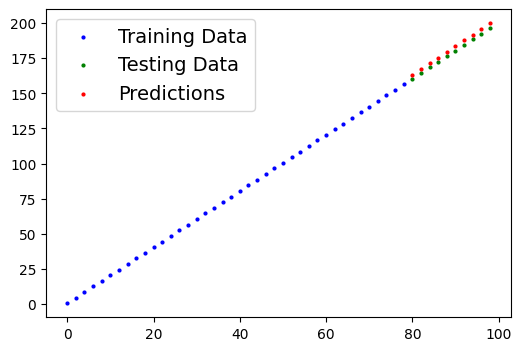

(tensor([[163.2148],
         [167.2939],
         [171.3729],
         [175.4520],
         [179.5310],
         [183.6100],
         [187.6891],
         [191.7682],
         [195.8472],
         [199.9263]]),
 tensor([[160.5000],
         [164.5000],
         [168.5000],
         [172.5000],
         [176.5000],
         [180.5000],
         [184.5000],
         [188.5000],
         [192.5000],
         [196.5000]], device='cuda:0'))

In [ ]:
plot_predictions(X_train.cpu().numpy(), y_train.cpu().numpy(), X_test.cpu().numpy(), y_test.cpu().numpy(), predictions=test_pred.cpu().numpy())
test_pred.cpu(),y_test

In [ ]:
!git clone https://github.com/adisberhe/pytorch-models-lab


Cloning into 'pytorch-models-lab'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
Receiving objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/linear_regression" .

cp: cannot stat '/content/drive/My Drive/Colab Notebooks/linear_regression.py': No such file or directory


In [35]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Ai.ipynb			Multiclass_classification.ipynb
cnn_with_custom_datasets.ipynb	NeuralN.ipynb
Computer_Vision.ipynb		nn_classification.ipynb
ConvNet.ipynb			Untitled0.ipynb
linear_regression.ipynb
